<a href="https://colab.research.google.com/github/claudio1975/SDS2020/blob/master/notebooks/workshop/3_An_Experimental_EDA_for_a_classification_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **An Experimental Exploratory Data Analysis for a Classification Task step 3**

### ***From Visualization to Statistical Analysis***

### ***From Feature Engineering to Feature Selection***

### ***From the Best Model Selection to Interpretability***



To start the exploration set up the environment with libraries, upload the data set (it's stored in a github repository) and split it into target variable and features variables. No more set up is required using Google Colab. Look at the guidelines: https://colab.research.google.com/notebooks/welcome.ipynb

#### **Contents**

The goal of this challenge, launched by CrowdAnalytix, is to develop a model to predict whether a mortgage will be funded or not based on certain factors in a customer’s application data. 
The evaluation metric used is the F1 score.
The data set is made up by 45.642 observations with predictor variables (21 features) and the target variable. It's a classification task with the goal to predict the 'Result' target variable for every row (Funded, Not Funded). Look at the competition: https://www.crowdanalytix.com/contests/propensity-to-fund-mortgages


### **Exploratory Data Analysis (EDA) Pipeline**

![](http://www.theleader.info/wp-content/uploads/2017/07/Mortgage-rates.jpg)

# Prepare Workspace

#####- Upload libraries

In [1]:
# Upload libraries

# to handle data set
import pandas as pd
import numpy as np

# to plot
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix

# statistics
import statistics
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import logit
from scipy.stats import chi2_contingency
from scipy.stats import kurtosis 
from scipy.stats import skew
from statistics import stdev 

# to split data set 
from sklearn.model_selection import train_test_split

# standardization
from sklearn.preprocessing import StandardScaler

# to build models
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

# to evaluate models
from sklearn.metrics import f1_score

# to handle imbalanced data set
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# feature engineering
!pip install feature-engine
import feature_engine
from sklearn.preprocessing import KBinsDiscretizer

# feature importance 
from sklearn.tree import DecisionTreeClassifier
!pip install eli5 
import eli5
from eli5.sklearn import PermutationImportance
!pip install shap
import shap
import eli5
from eli5.sklearn import PermutationImportance

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


     |████████████████████████████████| 8.7MB 5.6MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


     |████████████████████████████████| 112kB 3.5MB/s 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


     |████████████████████████████████| 276kB 3.5MB/s 
  Created wheel for shap: filename=shap-0.35.0-cp36-cp36m-linux_x86_64.whl size=394116 sha256=ef82653607102aa224633eb6f37930bf9a07031f674a717d96a9a0917cd30ebc
  Stored in directory: /root/.cache/pip/wheels/e7/f7/0f/b57055080cf8894906b3bd3616d2fc2bfd0b12d5161bcb24ac
Successfully built shap


#####- Upload data set

In [2]:
# Upload dataset
url ='https://raw.githubusercontent.com/claudio1975/SDS2020/master/data/CAX_MortgageModeling_Train.csv'
df = pd.read_csv(url)

#####- Split data set

In [3]:
# Split data set between target and features
X_full = df
y = X_full.RESULT
X_full = X_full.drop(['RESULT'], axis=1)


# Summarize Data

In [4]:
# Look at dimension of data set and types of each attribute
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45642 entries, 0 to 45641
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unique_ID          45642 non-null  object 
 1   MORTGAGE NUMBER    45642 non-null  int64  
 2   PROPERTY VALUE     45642 non-null  int64  
 3   MORTGAGE PAYMENT   45642 non-null  int64  
 4   GDS                45642 non-null  float64
 5   LTV                45642 non-null  float64
 6   TDS                45642 non-null  float64
 7   AMORTIZATION       45642 non-null  int64  
 8   MORTGAGE AMOUNT    45642 non-null  float64
 9   RATE               45642 non-null  float64
 10  MORTGAGE PURPOSE   45642 non-null  object 
 11  PAYMENT FREQUENCY  45642 non-null  object 
 12  PROPERTY TYPE      45642 non-null  object 
 13  TERM               45642 non-null  int64  
 14  FSA                45642 non-null  object 
 15  AGE RANGE          45642 non-null  object 
 16  GENDER             456

In [5]:
# Summarize attribute distributions of the data frame
df.describe(include='all')

,Unique_ID,MORTGAGE NUMBER,PROPERTY VALUE,MORTGAGE PAYMENT,GDS,LTV,TDS,AMORTIZATION,MORTGAGE AMOUNT,RATE,MORTGAGE PURPOSE,PAYMENT FREQUENCY,PROPERTY TYPE,TERM,FSA,AGE RANGE,GENDER,INCOME,INCOME TYPE,NAICS CODE,CREDIT SCORE,RESULT
count,45642,45642.00000,4.564200e+04,45642.000000,4.564200e+04,45642.000000,4.564200e+04,45642.000000,4.564200e+04,45642.000000,45642,45642,45642,45642.000000,45642,45642,45642,4.564200e+04,45642.000000,45642,45642.000000,45642
unique,45642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,6,8,NaN,1141,11,3,NaN,NaN,19,NaN,2
top,CAX_Train_16932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Purchase,Monthly,Single Detached,NaN,L7A,45-49,Male,NaN,NaN,56,NaN,FUNDED
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24419,42785,29377,NaN,898,7645,24849,NaN,NaN,11245,NaN,36023
mean,NaN,22821.50000,5.826110e+05,2392.148043,2.138033e+02,70.632932,4.125670e+02,355.309583,4.255704e+05,4.651149,NaN,NaN,NaN,15.286578,NaN,NaN,NaN,1.251093e+05,5.315017,NaN,662.662811,NaN
std,NaN,13175.85483,4.382082e+05,1688.208721,3.263766e+04,11.566444,6.425859e+04,18.011798,3.020469e+05,0.642371,NaN,NaN,NaN,7.443857,NaN,NaN,NaN,1.149974e+05,3.267761,NaN,132.818234,NaN
min,NaN,1.00000,1.400000e+04,141.000000,-3.704000e+01,6.667000,-1.070000e+01,60.000000,1.500000e+04,2.500000,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,1.000000e+03,-1.000000,NaN,0.000000,NaN
25%,NaN,11411.25000,3.400000e+05,1406.000000,1.984000e+01,65.000000,3.284000e+01,360.000000,2.459250e+05,4.250000,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,6.800000e+04,2.000000,NaN,623.000000,NaN
50%,NaN,22821.50000,4.770000e+05,2033.000000,2.921000e+01,75.000000,3.830000e+01,360.000000,3.575000e+05,4.500000,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,9.700000e+04,6.000000,NaN,677.000000,NaN
75%,NaN,34231.75000,6.850000e+05,2866.000000,3.587000e+01,80.000000,4.217000e+01,360.000000,5.120000e+05,5.000000,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,1.450000e+05,8.000000,NaN,736.000000,NaN


In [6]:
# Take a peek at the first rows of the data
df.head(10)

,Unique_ID,MORTGAGE NUMBER,PROPERTY VALUE,MORTGAGE PAYMENT,GDS,LTV,TDS,AMORTIZATION,MORTGAGE AMOUNT,RATE,MORTGAGE PURPOSE,PAYMENT FREQUENCY,PROPERTY TYPE,TERM,FSA,AGE RANGE,GENDER,INCOME,INCOME TYPE,NAICS CODE,CREDIT SCORE,RESULT
0,CAX_Train_1,1,900000,5429,61.98,65.000,71.63,360,1040000.0,4.0,Refinance,Monthly,Single Detached,12,L4C,Under 25,Male,108000,8,44-45,681,FUNDED
1,CAX_Train_2,2,386000,2179,35.22,74.290,40.65,360,390000.0,4.5,Refinance,Monthly,Single Detached,12,L9T,70 and over,Male,78000,2,56,710,FUNDED
2,CAX_Train_3,3,531000,2152,30.97,80.000,35.41,360,424800.0,3.5,Purchase,Monthly,Single Detached,6,M1N,35-39,Female,87000,2,72,709,FUNDED
3,CAX_Train_4,4,1200000,5410,19.04,75.000,34.14,360,960000.0,5.5,Purchase,Monthly,Single Detached,12,M2M,45-49,Male,300000,8,54,761,FUNDED
4,CAX_Train_5,5,350000,3342,29.59,80.000,34.85,360,592000.0,5.0,Refinance,Monthly,Single Detached,12,L7G,50-54,Male,147000,8,62,762,FUNDED
5,CAX_Train_6,6,420000,2179,26.16,69.050,26.16,240,290000.0,5.5,Refinance,Monthly,Single Detached,24,M1M,40-44,Female,106000,2,53,570,FUNDED
6,CAX_Train_7,7,1600000,5275,32.12,69.230,33.90,360,900000.0,4.0,Refinance,Monthly,Single Detached,12,L7B,55-59,Female,185000,8,56,812,FUNDED
7,CAX_Train_8,8,1500000,4383,35.68,55.170,37.81,360,644000.0,4.0,Refinance,Monthly,Single Detached,12,L3P,45-49,Male,160000,8,48-49,683,FUNDED
8,CAX_Train_9,9,790000,3092,35.29,78.481,35.40,360,620000.0,3.5,Refinance,Monthly,Single Detached,60,M4C,45-49,Female,89000,2,61,684,NOT FUNDED
9,CAX_Train_10,10,650000,1839,38.78,41.850,38.98,360,272000.0,5.5,Purchase,Monthly,Single Detached,12,L4W,40-44,Male,60000,2,56,716,FUNDED


Explanatory variables are grouped into categorical variables and numerical variables and for each one let's do a graphical and non-graphical analysis, but before this split let's run some some data preparation activities.

# Formatting Features

If necessary, it's a good practice to format data, after have taken a peek of it. Missing values on numeric features are marked by "-1", meanwhile for categorical features they are marked with "Unknown"; let's imput these values with "NA".  

In [7]:
# Replaced both '-1' and 'Unknown' values with NA's
X_full[X_full== -1] = np.nan
X_full[X_full=="Unknown"] = np.nan

In [8]:
# Format data into float and object types and split mixed variables
X_full['PROPERTY VALUE'] = X_full['PROPERTY VALUE'].astype(float)
X_full['MORTGAGE PAYMENT'] = X_full['MORTGAGE PAYMENT'].astype(float)
X_full['AMORTIZATION'] = X_full['AMORTIZATION'].astype(float)
X_full['TERM'] = X_full['TERM'].astype(float)
X_full['INCOME'] = X_full['INCOME'].astype(float)
X_full['INCOME TYPE'] = X_full['INCOME TYPE'].astype(object)
X_full['CREDIT SCORE'] = X_full['CREDIT SCORE'].astype(float)
X_full['FSA_num'] = X_full['FSA'].str.extract('(\d+)') # extract numerical part
X_full['FSA_let'] = X_full['FSA'].str[0] # extract the first letter

In [9]:
# Rename some features for a practical use
X_full = X_full.rename(columns={"MORTGAGE PURPOSE":"MORTGAGE_PURPOSE","PAYMENT FREQUENCY":"PAYMENT_FREQUENCY","PROPERTY TYPE":"PROPERTY_TYPE","AGE RANGE":"AGE_RANGE","PROPERTY VALUE": "PROPERTY_VALUE",
                                "MORTGAGE PAYMENT": "MORTGAGE_PAYMENT", "MORTGAGE AMOUNT":"MORTGAGE_AMOUNT","INCOME TYPE":"INCOME_TYPE","CREDIT SCORE":"CREDIT_SCORE"})

# Handling missing values

There are two categorical features with missing values lower than 40%. The approach followed: fill up missing values with the mode of each variable and for both of them let's creat a boolean feature with 1 (true-missing value) or 0 (false-actual value). "[Pawel Grabinski](https://www.kdnuggets.com/2018/12/feature-engineering-explained.html)"

In [10]:
# Check missing values both to numeric features and categorical features
X_full.isnull().sum()/X_full.shape[0]*100

Unique_ID             0.000000
MORTGAGE NUMBER       0.000000
PROPERTY_VALUE        0.000000
MORTGAGE_PAYMENT      0.000000
GDS                   0.000000
LTV                   0.000000
TDS                   0.000000
AMORTIZATION          0.000000
MORTGAGE_AMOUNT       0.000000
RATE                  0.000000
MORTGAGE_PURPOSE      0.000000
PAYMENT_FREQUENCY     0.000000
PROPERTY_TYPE         0.000000
TERM                  0.000000
FSA                   0.000000
AGE_RANGE             0.000000
GENDER               14.061610
INCOME                0.000000
INCOME_TYPE           0.269489
NAICS CODE            0.000000
CREDIT_SCORE          0.000000
FSA_num               0.000000
FSA_let               0.000000
dtype: float64

In [11]:
# Attaching boolean feature for each variable with missing values
X_full['GENDER_'] = np.where(X_full['GENDER'].isnull(), 1, 0)
X_full['GENDER_'] = X_full['GENDER_'].astype(object)
X_full['INCOME_TYPE_'] = np.where(X_full['INCOME_TYPE'].isnull(), 1, 0)
X_full['INCOME_TYPE_'] = X_full['INCOME_TYPE_'].astype(object)

In [12]:
# Input missing values with median or mode depending of features class
X_full['GENDER'].fillna(X_full['GENDER'].mode()[0], inplace=True)
X_full['GENDER'] = X_full['GENDER'].astype(object)
X_full['INCOME_TYPE'].fillna(X_full['INCOME_TYPE'].mode()[0], inplace=True)
X_full['INCOME_TYPE'] = X_full['INCOME_TYPE'].astype(object)

In [13]:
# final check
X_full.isnull().sum()/X_full.shape[0]*100

Unique_ID            0.0
MORTGAGE NUMBER      0.0
PROPERTY_VALUE       0.0
MORTGAGE_PAYMENT     0.0
GDS                  0.0
LTV                  0.0
TDS                  0.0
AMORTIZATION         0.0
MORTGAGE_AMOUNT      0.0
RATE                 0.0
MORTGAGE_PURPOSE     0.0
PAYMENT_FREQUENCY    0.0
PROPERTY_TYPE        0.0
TERM                 0.0
FSA                  0.0
AGE_RANGE            0.0
GENDER               0.0
INCOME               0.0
INCOME_TYPE          0.0
NAICS CODE           0.0
CREDIT_SCORE         0.0
FSA_num              0.0
FSA_let              0.0
GENDER_              0.0
INCOME_TYPE_         0.0
dtype: float64

# Target Variable Analysis

The target variable is grouped into two classes: "Funded" and "Not Funded". Looking at the barplot, it's quite imbalanced.

In [14]:
# Summarize the class distribution 
count = pd.crosstab(index = y, columns="count")
percentage = pd.crosstab(index = y, columns="frequency")/pd.crosstab(index = y, columns="frequency").sum()
pd.concat([count, percentage], axis=1)

col_0,count,frequency
RESULT,,
FUNDED,36023,0.789251
NOT FUNDED,9619,0.210749


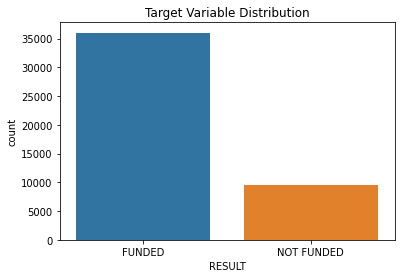

In [15]:

# Plot the target variable
ax = sns.countplot(x=y, data=X_full, order=["FUNDED", "NOT FUNDED"]).set_title("Target Variable Distribution")

# Categorical Features Analysis


#####- Analysis for categorical features (barplot, univariate analysis, bivariate analysis)

Let's group all categorical features into a new subset: let's run a graphical analysis using barplots and count the frequency for each class. For a bivariate analysis it's been used a Chi-Square Test to evaluate the relationship between the target variable and each categorical feature. 

In [16]:
# let's have a look at how many labels for categorical features
for col in X_full.columns:
  if X_full[col].dtype =="object":
    print(col, ': ', len(X_full[col].unique()), ' labels')

Unique_ID :  45642  labels
MORTGAGE_PURPOSE :  2  labels
PAYMENT_FREQUENCY :  6  labels
PROPERTY_TYPE :  8  labels
FSA :  1141  labels
AGE_RANGE :  11  labels
GENDER :  2  labels
INCOME_TYPE :  20  labels
NAICS CODE :  19  labels
FSA_num :  10  labels
FSA_let :  17  labels
GENDER_ :  2  labels
INCOME_TYPE_ :  2  labels


In [17]:
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X_full.columns if
                    X_full[cname].nunique() <= 15 and 
                    X_full[cname].dtype == "object"]

In [18]:
# Subset with categorical features
cat = X_full[categorical_cols]
cat.columns


Index(['MORTGAGE_PURPOSE', 'PAYMENT_FREQUENCY', 'PROPERTY_TYPE', 'AGE_RANGE',
       'GENDER', 'FSA_num', 'GENDER_', 'INCOME_TYPE_'],
      dtype='object')

In [19]:
cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45642 entries, 0 to 45641
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   MORTGAGE_PURPOSE   45642 non-null  object
 1   PAYMENT_FREQUENCY  45642 non-null  object
 2   PROPERTY_TYPE      45642 non-null  object
 3   AGE_RANGE          45642 non-null  object
 4   GENDER             45642 non-null  object
 5   FSA_num            45642 non-null  object
 6   GENDER_            45642 non-null  object
 7   INCOME_TYPE_       45642 non-null  object
dtypes: object(8)
memory usage: 2.8+ MB


col_0             count  frequency
MORTGAGE_PURPOSE                  
Purchase          24419   0.535012
Refinance         21223   0.464988


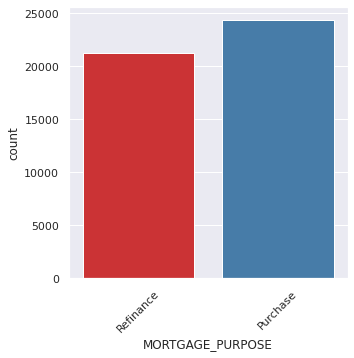

col_0                  count  frequency
PAYMENT_FREQUENCY                      
Bi-Weekly               1803   0.039503
Bi-Weekly Accelerated   1047   0.022939
Monthly                42785   0.937404
Semi-Monthly               4   0.000088
Weekly                     2   0.000044
Weekly Accelerated         1   0.000022


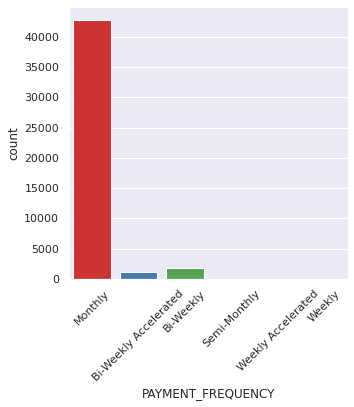

col_0                  count  frequency
PROPERTY_TYPE                          
Duplex                   469   0.010276
Fourplex                 118   0.002585
High Rise               5909   0.129464
Semi-Detached           4227   0.092612
Single Detached        29377   0.643640
Townhouse Condominium   2309   0.050589
Townhouse Freehold      3040   0.066605
Triplex                  193   0.004229


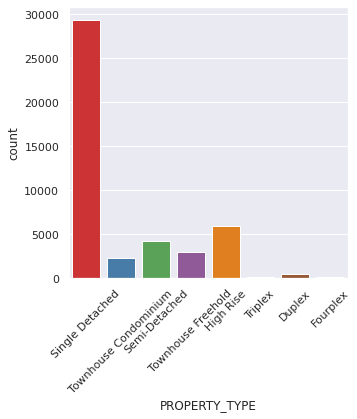

col_0        count  frequency
AGE_RANGE                    
25-29         2534   0.055519
30-34         4551   0.099711
35-39         5818   0.127470
40-44         6877   0.150673
45-49         7645   0.167499
50-54         6801   0.149007
55-59         4710   0.103194
60-64         2816   0.061698
65-69         1678   0.036764
70 and over   1374   0.030104
Under 25       838   0.018360


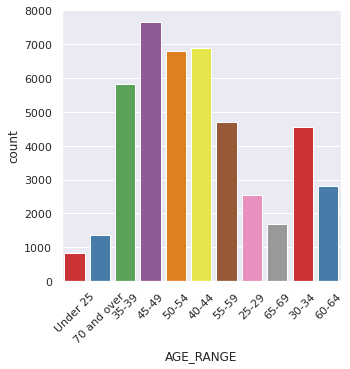

col_0   count  frequency
GENDER                  
Female  14375   0.314951
Male    31267   0.685049


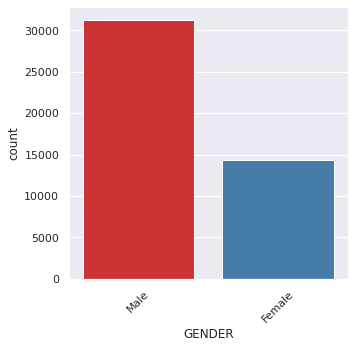

col_0    count  frequency
FSA_num                  
0         2138   0.046843
1         7961   0.174423
2         4017   0.088011
3         4593   0.100631
4         6348   0.139082
5         4497   0.098528
6         7630   0.167171
7         3101   0.067942
8         1778   0.038955
9         3579   0.078415


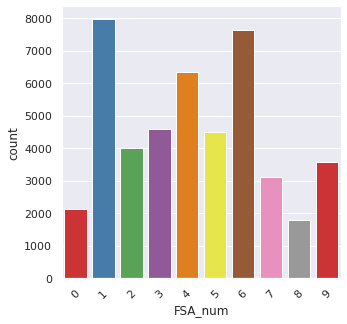

In [20]:
# Univariate analysis with frequency and barplots
sns.set( rc = {'figure.figsize': (5, 5)})
fcat = ['MORTGAGE_PURPOSE','PAYMENT_FREQUENCY','PROPERTY_TYPE','AGE_RANGE','GENDER','FSA_num']

for col in fcat:
    count = pd.crosstab(index = cat[col], columns="count")
    percentage = pd.crosstab(index = cat[col], columns="frequency")/pd.crosstab(index = cat[col], columns="frequency").sum()
    tab = pd.concat([count, percentage], axis=1)
    plt.figure()
    sns.countplot(x=cat[col], data=cat, palette="Set1")
    plt.xticks(rotation=45)
    print(tab)
    plt.show()

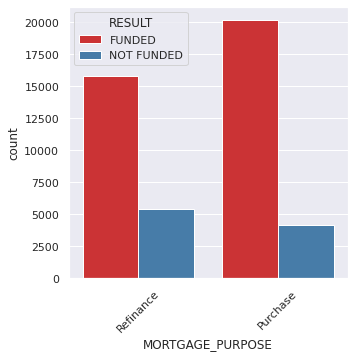

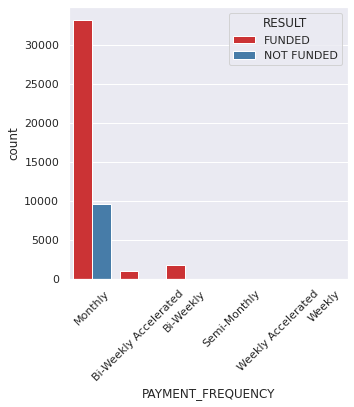

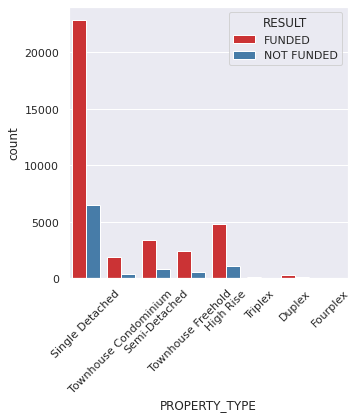

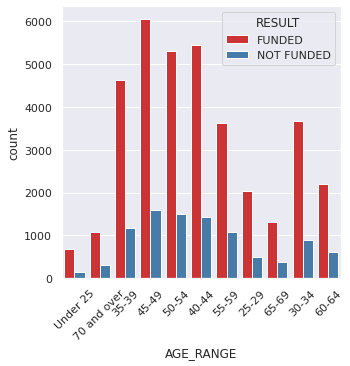

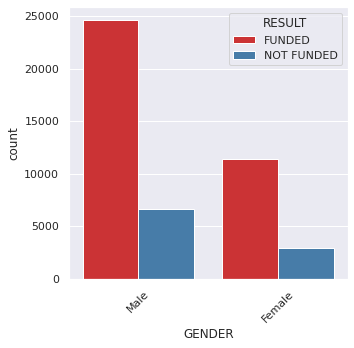

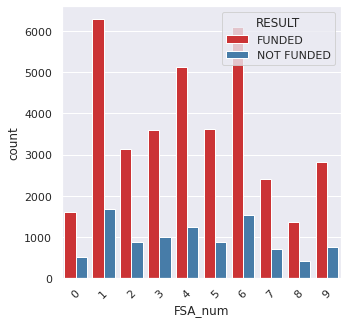

In [21]:
# Bivariate analysis with barplots
sns.set( rc = {'figure.figsize': (5, 5)})
fcat = ['MORTGAGE_PURPOSE','PAYMENT_FREQUENCY','PROPERTY_TYPE','AGE_RANGE','GENDER','FSA_num']

for col in fcat:
    plt.figure()
    sns.countplot(x=cat[col], hue=y, data=cat, palette="Set1")
    plt.xticks(rotation=45)
    plt.show()

#####- Feature Selection

The Chi-Square Test is used as feature selection testing the independence between target variable and categorical features. 

In [22]:
# Joined target variable with categorical features in a new data frame for a Chi-Square Test
cat2 = pd.concat([y,cat], axis=1)
testColumns = ['MORTGAGE_PURPOSE','PAYMENT_FREQUENCY','PROPERTY_TYPE','AGE_RANGE','GENDER','GENDER_','INCOME_TYPE_','FSA_num']

In [23]:
alpha = 0.05
for var in testColumns:
    X = cat2[var].astype(str)
    Y = cat2['RESULT'].astype(str)
    dfObserved = pd.crosstab(Y,X)
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    if p <= alpha:
    	print('{0} Dependent (reject H0)'.format(var))
    else:
       print('{0} Independent (fail to reject H0)'.format(var))

MORTGAGE_PURPOSE Dependent (reject H0)
PAYMENT_FREQUENCY Dependent (reject H0)
PROPERTY_TYPE Dependent (reject H0)
AGE_RANGE Dependent (reject H0)
GENDER Independent (fail to reject H0)
GENDER_ Dependent (reject H0)
INCOME_TYPE_ Independent (fail to reject H0)
FSA_num Dependent (reject H0)


In [24]:
# Drop features not helpful by Feature Selection
cat = cat.drop(['GENDER', 'INCOME_TYPE_'], axis=1)
cat.shape

(45642, 6)

#####- Feature Engineering on categorical features: one-hot encoding

Let's transform categorical features into numerical variables with one-hot encoding methodology to afford a better understanding of variables by machine learning models.

In [25]:
# One-hot encode the data (to shorten the code, I use pandas)
HOcat = pd.concat([pd.get_dummies(cat.MORTGAGE_PURPOSE, drop_first=True), pd.get_dummies(cat.PAYMENT_FREQUENCY, drop_first=True), pd.get_dummies(cat.PROPERTY_TYPE, drop_first=True), 
                  pd.get_dummies(cat.AGE_RANGE, drop_first=True), pd.get_dummies(cat.GENDER_, prefix='MISS_GENDER', drop_first=True), pd.get_dummies(cat.FSA_num,prefix='FSA_num',drop_first=True)], axis=1)

HOcat = HOcat.astype(int)


In [26]:
# Look at the new subset
HOcat.shape

(45642, 33)

In [27]:
HOcat.head()

,Refinance,Bi-Weekly Accelerated,Monthly,Semi-Monthly,Weekly,Weekly Accelerated,Fourplex,High Rise,Semi-Detached,Single Detached,Townhouse Condominium,Townhouse Freehold,Triplex,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70 and over,Under 25,MISS_GENDER_1,FSA_num_1,FSA_num_2,FSA_num_3,FSA_num_4,FSA_num_5,FSA_num_6,FSA_num_7,FSA_num_8,FSA_num_9
0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


# Numerical Features Analysis

#####- Analysis for numerical features (distribution, univariate analysis, bivariate analysis)

In [28]:
# Select numerical columns
numerical_cols = [cname for cname in X_full.columns if 
                X_full[cname].dtype in ['float64']]

In [29]:
# Subset with numerical features
num = X_full[numerical_cols]
num.columns

Index(['PROPERTY_VALUE', 'MORTGAGE_PAYMENT', 'GDS', 'LTV', 'TDS',
       'AMORTIZATION', 'MORTGAGE_AMOUNT', 'RATE', 'TERM', 'INCOME',
       'CREDIT_SCORE'],
      dtype='object')

In [30]:
num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45642 entries, 0 to 45641
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PROPERTY_VALUE    45642 non-null  float64
 1   MORTGAGE_PAYMENT  45642 non-null  float64
 2   GDS               45642 non-null  float64
 3   LTV               45642 non-null  float64
 4   TDS               45642 non-null  float64
 5   AMORTIZATION      45642 non-null  float64
 6   MORTGAGE_AMOUNT   45642 non-null  float64
 7   RATE              45642 non-null  float64
 8   TERM              45642 non-null  float64
 9   INCOME            45642 non-null  float64
 10  CREDIT_SCORE      45642 non-null  float64
dtypes: float64(11)
memory usage: 3.8 MB


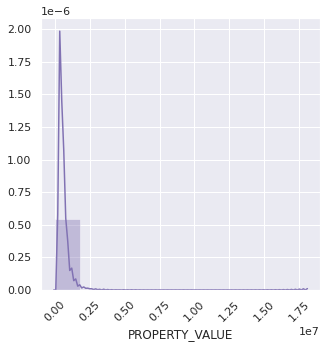

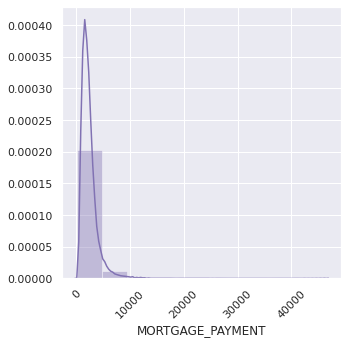

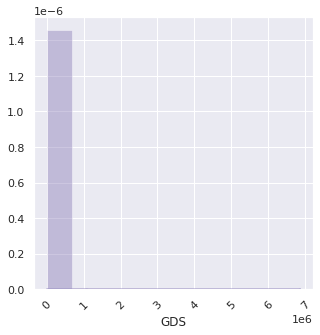

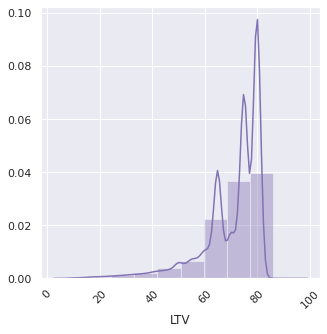

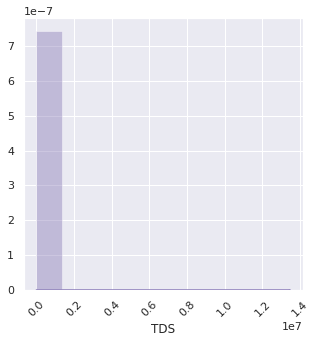

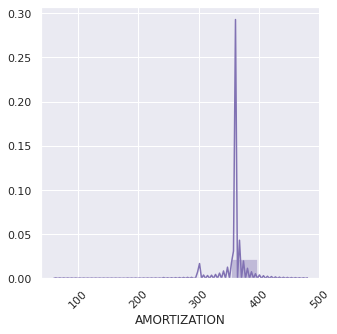

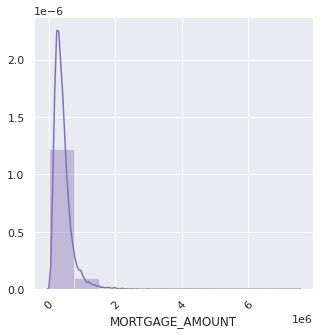

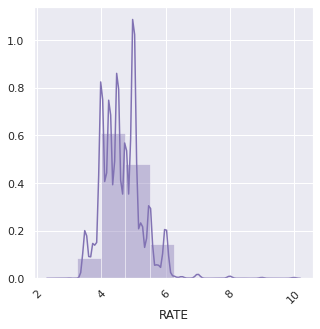

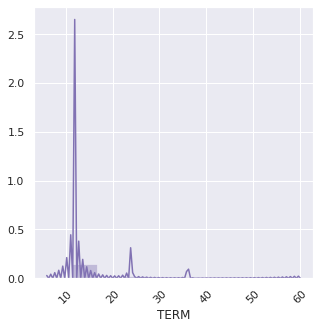

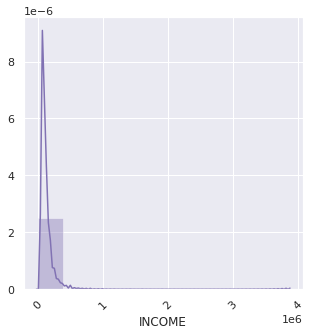

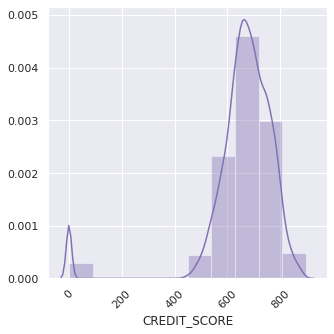

In [31]:
# Univariate analysis with density plots and histograms
sns.set( rc = {'figure.figsize': (5, 5)})
fnum = ['PROPERTY_VALUE', 'MORTGAGE_PAYMENT','GDS', 'LTV', 'TDS', 'AMORTIZATION','MORTGAGE_AMOUNT', 'RATE', 'TERM', 'INCOME', 'CREDIT_SCORE']

for col in fnum:
    plt.figure()
    x=num[col]
    sns.distplot(x, bins=10, color='m')
    plt.xticks(rotation=45)
    plt.show()    

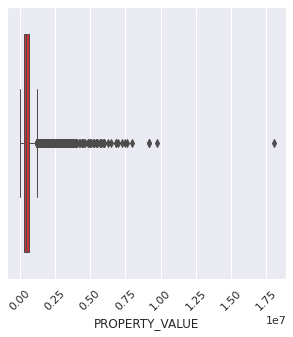

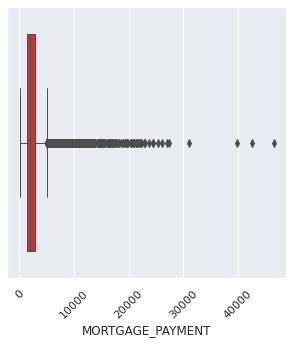

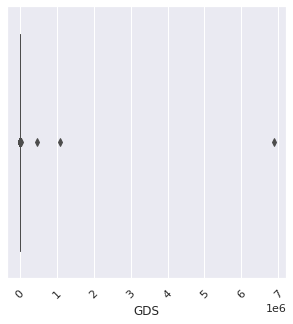

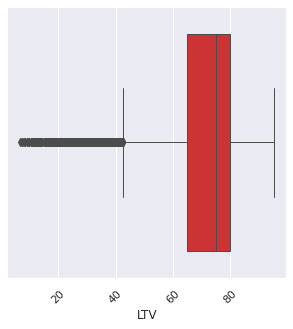

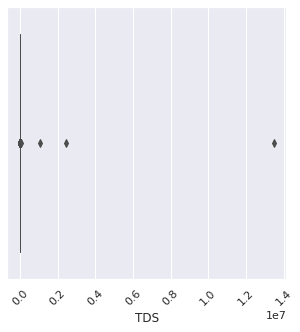

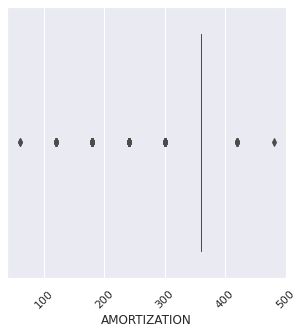

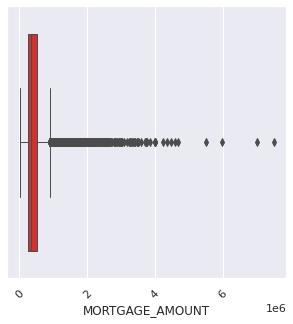

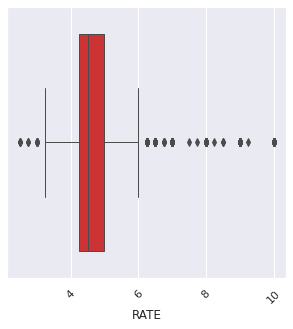

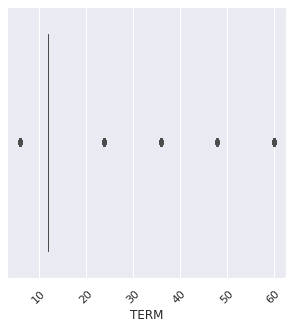

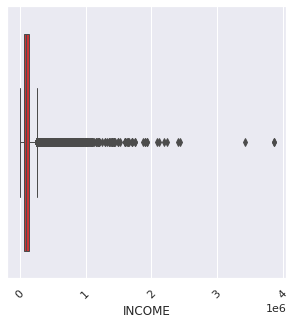

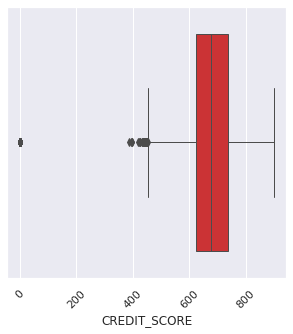

In [32]:
# Univariate analysis with box-plots
for col in fnum:
    plt.figure()
    x=num[col]
    sns.boxplot(x,palette="Set1",linewidth=1)
    plt.xticks(rotation=45)
    plt.show()

In [33]:
# Univariate analysis looking at Standard Deviation, Skewness and Kurtosis
for col in fnum:
  print(col,'\nStandard Deviation :', stdev(num[col]), 
        '\nSkewness :', skew(num[col]), 
        '\nKurtosis :', kurtosis(num[col]))

PROPERTY_VALUE 
Standard Deviation : 438208.2085427996 
Skewness : 5.644266384349458 
Kurtosis : 93.72909347332983
MORTGAGE_PAYMENT 
Standard Deviation : 1688.2087213532793 
Skewness : 4.402400077337014 
Kurtosis : 47.45818870386354
GDS 
Standard Deviation : 32637.66446592655 
Skewness : 205.39129293990604 
Kurtosis : 43090.063976937345
LTV 
Standard Deviation : 11.566443844367008 
Skewness : -1.871170163173591 
Kurtosis : 4.149196542952344
TDS 
Standard Deviation : 64258.59487835621 
Skewness : 202.799209574294 
Kurtosis : 42253.121451125626
AMORTIZATION 
Standard Deviation : 18.011798136682657 
Skewness : -4.6857601326562355 
Kurtosis : 31.39960985033308
MORTGAGE_AMOUNT 
Standard Deviation : 302046.8769420545 
Skewness : 3.8603597794173012 
Kurtosis : 35.0376970193198
RATE 
Standard Deviation : 0.6423709503915852 
Skewness : 1.1712117465210128 
Kurtosis : 5.2781194112118435
TERM 
Standard Deviation : 7.443856684506333 
Skewness : 2.505016893759331 
Kurtosis : 7.286565126841463
INCOME

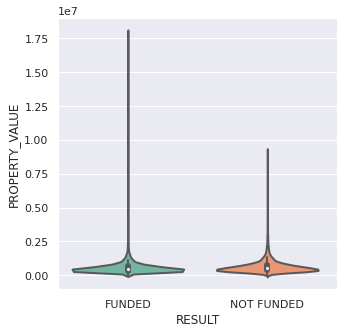

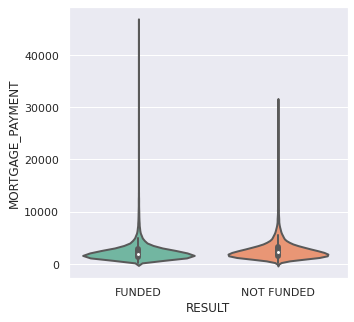

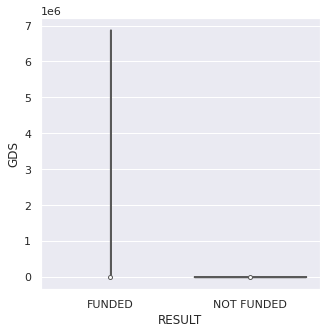

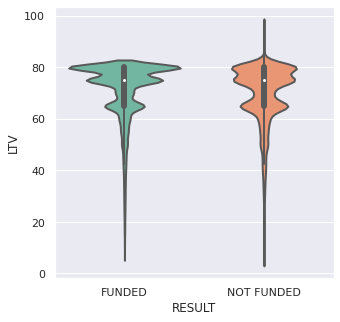

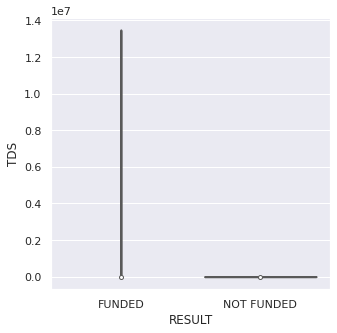

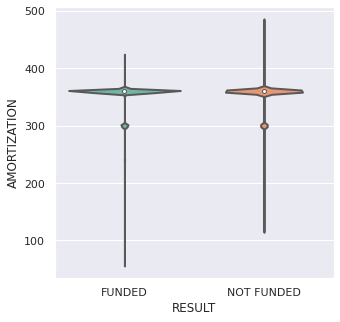

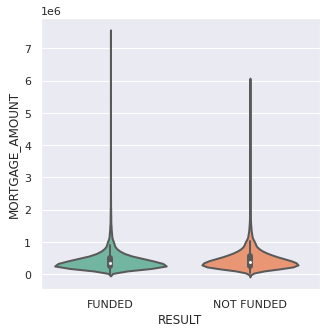

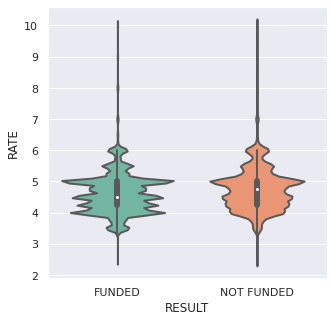

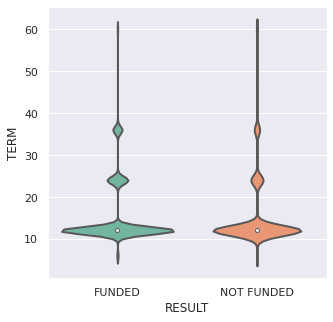

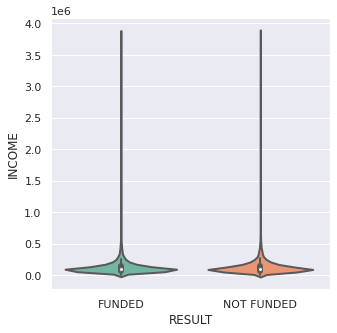

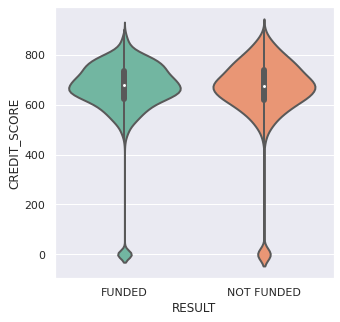

In [34]:
# Bivariate analysis with box-plots
for col in fnum:
    plt.figure()
    sns.violinplot(y=col, x=y, data=num, linewidth=2, palette="Set2")
    plt.show()

####- Feature Selection

The Anova Test on the Logistic Regression is used as feature selection testing the importance of the predictor variables. 

In [35]:
# Merging numerical covariates with dependent variable
num2 = pd.concat([y,num], axis=1)
num2['RESULT'] = np.where(num2['RESULT']=='FUNDED',1,0)

In [36]:
# Anova Test on Logistic Regression
formula = ('RESULT ~ PROPERTY_VALUE+MORTGAGE_PAYMENT+GDS+LTV+TDS+AMORTIZATION+MORTGAGE_AMOUNT+RATE+TERM+INCOME+CREDIT_SCORE')
results = logit(formula=formula, data=num2).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.505426
         Iterations 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 RESULT   No. Observations:                45642
Model:                          Logit   Df Residuals:                    45630
Method:                           MLE   Df Model:                           11
Date:                Wed, 17 Jun 2020   Pseudo R-squ.:                 0.01849
Time:                        21:07:35   Log-Likelihood:                -23069.
converged:                       True   LL-Null:                       -23503.
Covariance Type:            nonrobust   LLR p-value:                2.731e-179
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.6653      0.269      6.195      0.000       1.138       2.192
PROPERTY_VALUE    1.353e-07   6.65e-08      2.034      0.042    4.95e-09    2.66e-07
MORTGAGE_PAYMENT    -0.0002   2.57e-05     -7.993      0.000      -0.000      -0.000
GDS                  0.0047      0.001      5.363      0.000       0.003       0.006
LTV                  0.0132      0.001     11.481      0.000       0.011       0.015
TDS                 -0.0009      0.000     -5.289      0.000      -0.001      -0.001
AMORTIZATION         0.0003      0.001      0.508      0.612      -0.001       0.002
MORTGAGE_AMOUNT   8.595e-09   1.51e-07      0.057      0.955   -2.88e-07    3.05e-07
RATE                -0.2627      0.019    -13.707      0.000      -0.300      -0.225
TERM                 0.0036      0.002      2.268      0.023       0.000       0.007
INCOME            1.188e-06   1.56e-07      7.608      0.000    8.82e-07    1.49e-06
CREDIT_SCORE      -5.74e-05   9.06e-05     -0.634      0.526      -0.000       0.000
====================================================================================
"""

In [37]:
# Drop features not helpful by Feature Selection
num = num.drop(['AMORTIZATION','MORTGAGE_AMOUNT','CREDIT_SCORE'], axis=1)
num.shape

(45642, 8)

# Feature Selection on all data set

Another feature selection approach is to observe correlation between variables, let's apply it on all data set. There are some models such as linear regression where related features can deteriorate the performance (multicollinearity). Though some ensemble models are not sensitive at this topic, “Ensembles of tree-based models”, the approach followed is to remove them anyway because we don't know which model to use in advance.

In [38]:
# Grasp all
X_all = pd.concat([HOcat, num], axis=1, join='inner')

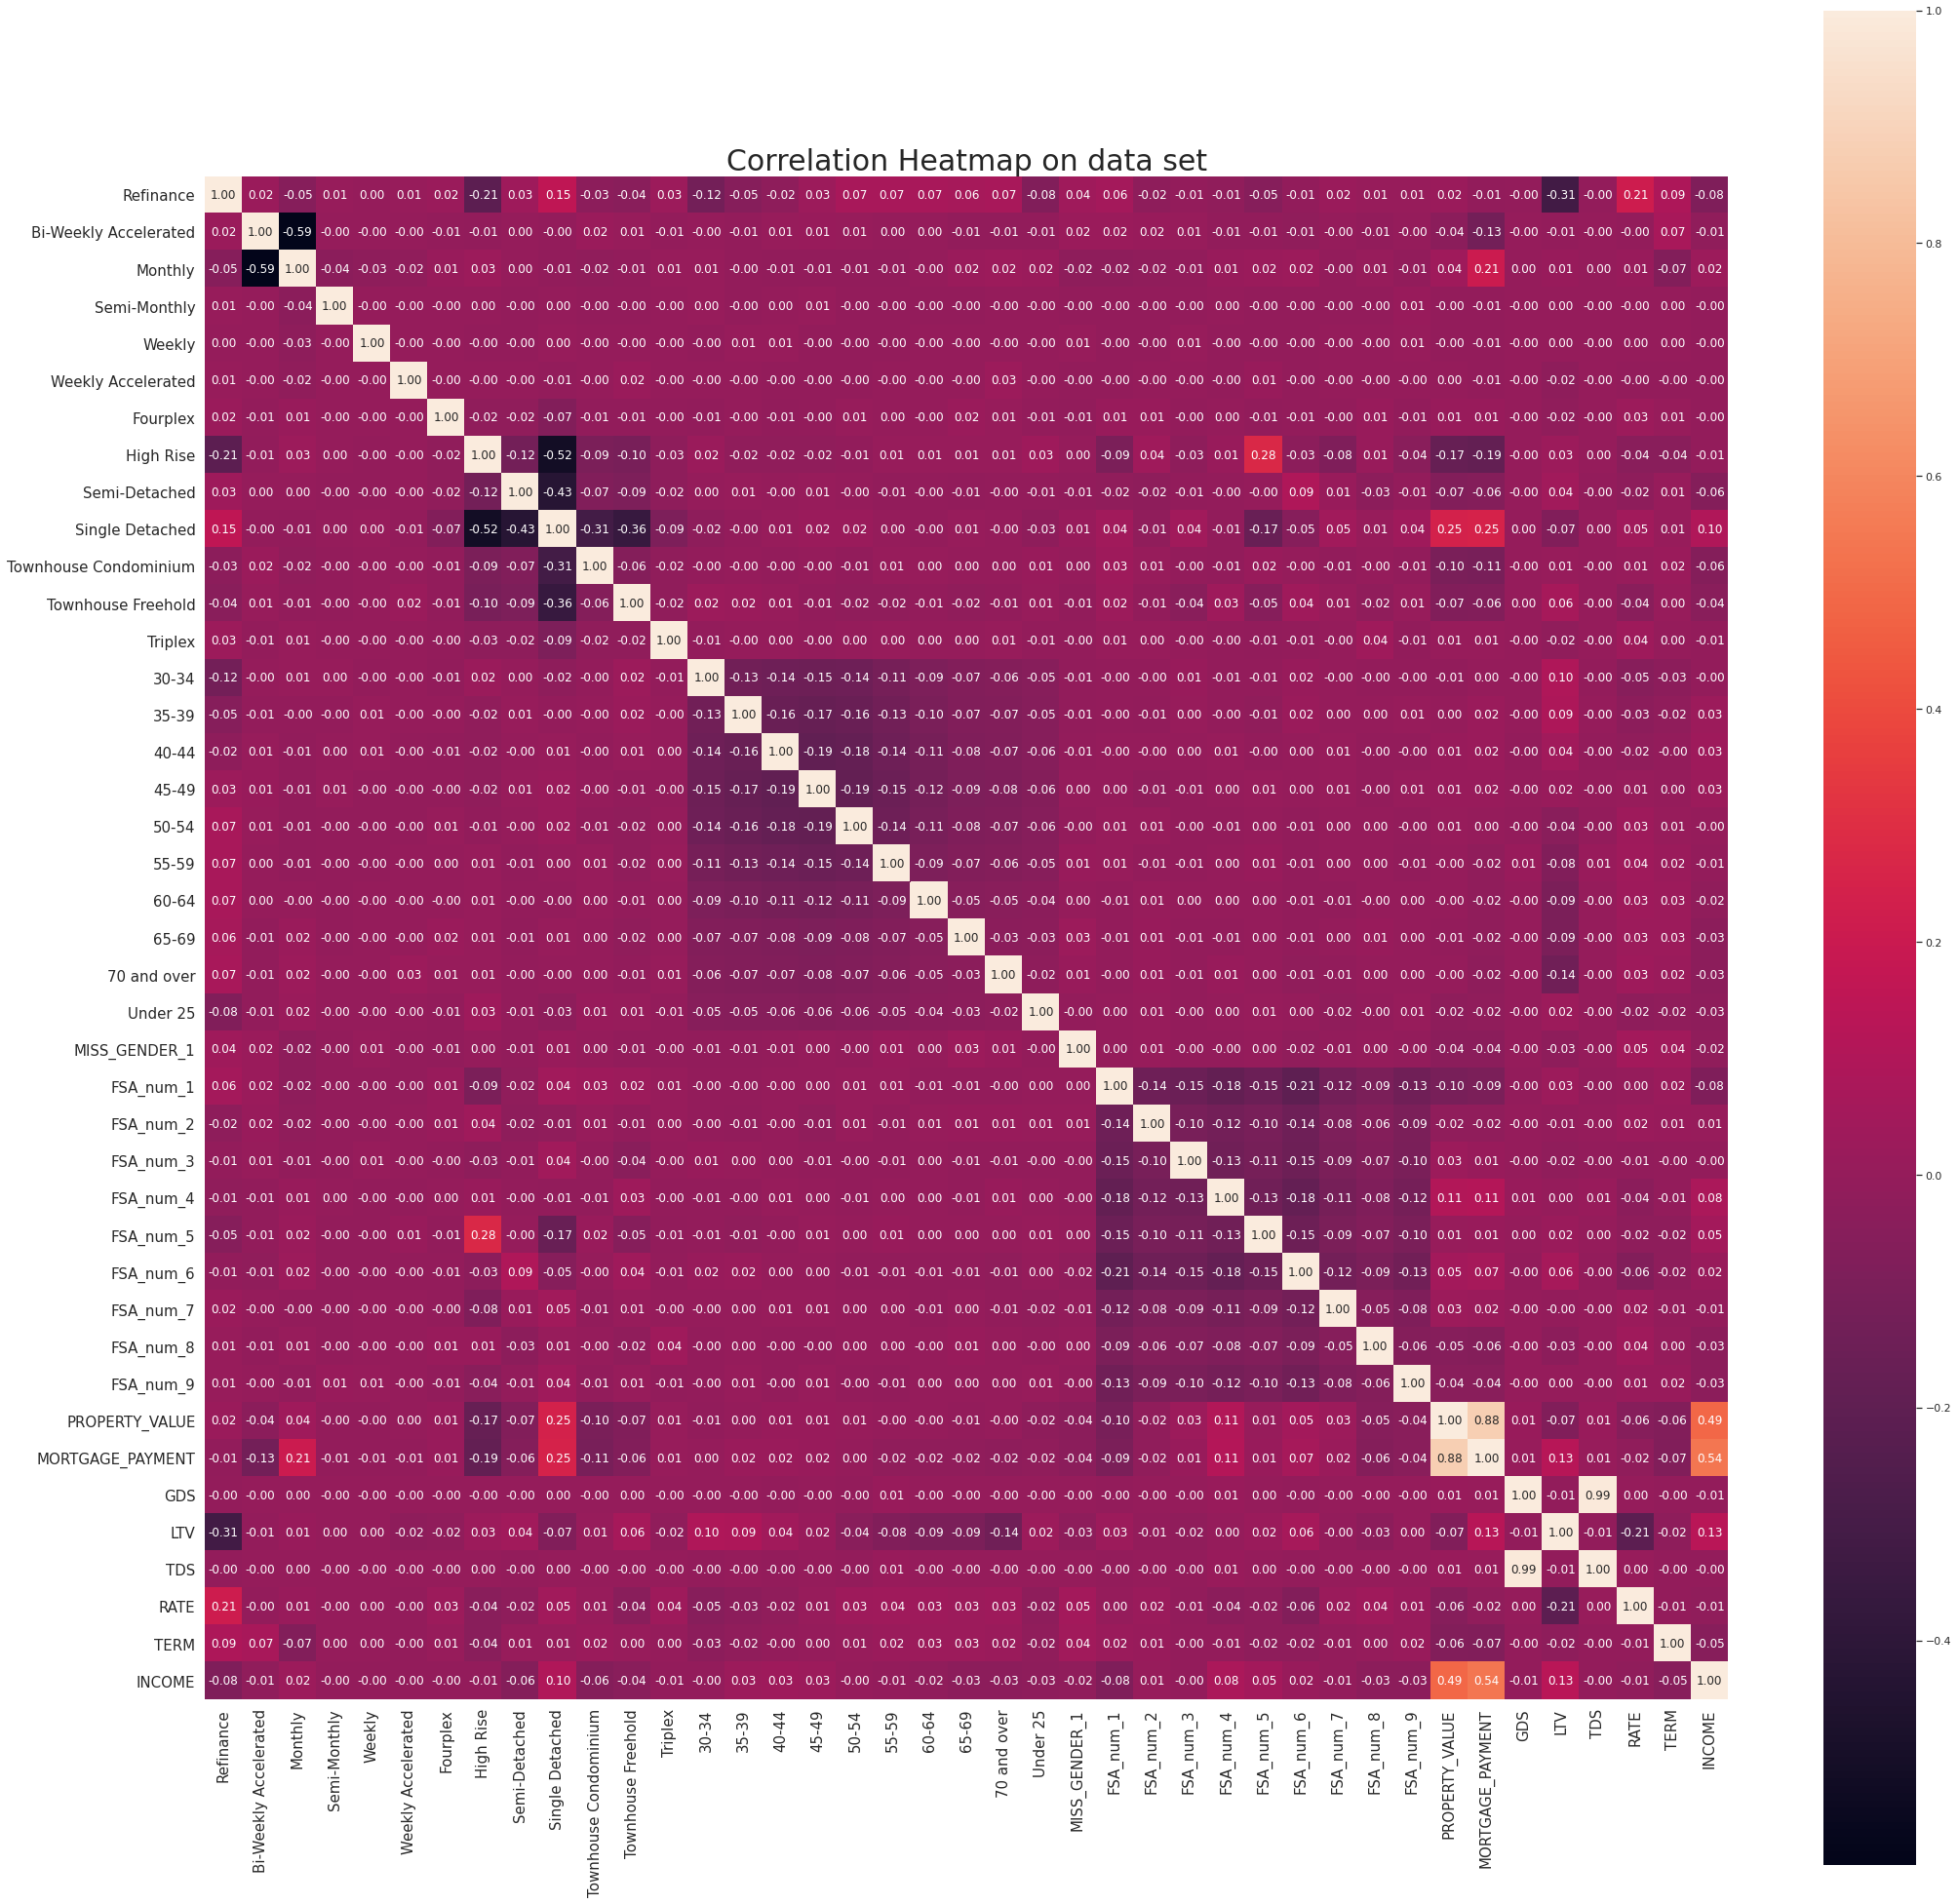

In [39]:
# Correlation heatmap
corr_matrix = X_all.corr()
sns.set( rc = {'figure.figsize': (35, 35)})
plt.figure()
sns.heatmap(corr_matrix, square = True, annot=True, fmt='.2f')
plt.title('Correlation Heatmap on data set',size=30)
plt.yticks(fontsize="15")
plt.xticks(fontsize="15")
plt.show()

In [40]:
# Select correlated features and removed it
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.75
to_drop = [column for column in upper.columns if any(upper[column].abs() > 0.75)]
to_drop

['MORTGAGE_PAYMENT', 'TDS']

In [41]:
# Drop features 
X_all = X_all.drop(X_all[to_drop], axis=1)

In [42]:
# Look at the new data set
X_all.shape

(45642, 39)

In [43]:
X_all.head()

,Refinance,Bi-Weekly Accelerated,Monthly,Semi-Monthly,Weekly,Weekly Accelerated,Fourplex,High Rise,Semi-Detached,Single Detached,Townhouse Condominium,Townhouse Freehold,Triplex,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70 and over,Under 25,MISS_GENDER_1,FSA_num_1,FSA_num_2,FSA_num_3,FSA_num_4,FSA_num_5,FSA_num_6,FSA_num_7,FSA_num_8,FSA_num_9,PROPERTY_VALUE,GDS,LTV,RATE,TERM,INCOME
0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,900000.0,61.98,65.00,4.0,12.0,108000.0
1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,386000.0,35.22,74.29,4.5,12.0,78000.0
2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,531000.0,30.97,80.00,3.5,6.0,87000.0
3,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1200000.0,19.04,75.00,5.5,12.0,300000.0
4,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,350000.0,29.59,80.00,5.0,12.0,147000.0


# Split data set

To analyze the performance of a model is a good manner to split the data set into the training set and the test set. It's been decided to split it into three parts: training set, validation set and test set for a better understanding of models. The training set is a sample of data used to fit the model, meanwhile the validation set is a sample of data used to provide an unbiased evaluation of the model that fit on the training set and to tune the model hyperparameters (not in this explorative phase). The test set is a sample of data used to provide an unbiased evaluation of the model applied on data never seen before.

In [44]:
# Break off validation and test set from training data
X_train, X_test, y_train, y_test = train_test_split(X_all, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.8, test_size=0.2,
                                                                random_state=0)

# Standardization

Since values of the features are not uniform and may be neagatively impact the skill of some models, the same models are evaluated with a standardized copy of the data set. It means, data are transformed such that each feature has a mean value of 0 and a standard deviation of 1. 

In [45]:
# Standardization of data
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_valid_sc = sc.fit_transform(X_valid)
X_test_sc = sc.transform(X_test)

# Modeling Part

The traditional data exploration is extended looking at the behaviour of several baseline models and which features can be relevant for the prediction. This exploration is splitted in two parts: without handling the imbalanced target variable (scaled baseline models) and handling it (scaled baseline models).  

- Evaluation Metric and Confusion Matrix

The confusion matrix is a summary table representation of prediction results for a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class. The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. Good predictions coming from the higher diagonal values of the confusion matrix. For this imbalanced classification task is not used Accuracy metric but more appropriately the F1 score metric that combines both precision and recall, it's an harmonic mean between them, it's indicates how precise is the classifier (precision) and how robust it is (recall). F1 score equal to 0.00 indicates a poor model, instead F1 score equal 1.00 indicates a perfect model.


#  Modeling Part I: without handling imbalanced data set

The analysis is based on six baseline models: Logistic Regression as the easiest model and as well as benchmark, then other five models: Bagging, Random Forest, AdaBoost, Gradient Boosting Machine and Neural Networks (MLP).

#####- Baseline Models

<Figure size 360x360 with 0 Axes>

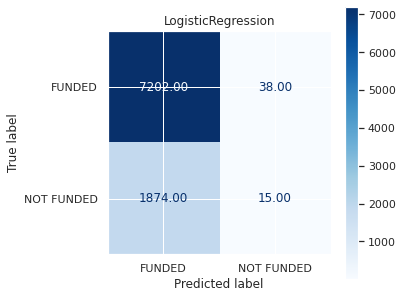

<Figure size 360x360 with 0 Axes>

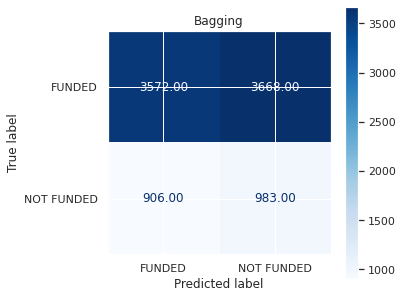

<Figure size 360x360 with 0 Axes>

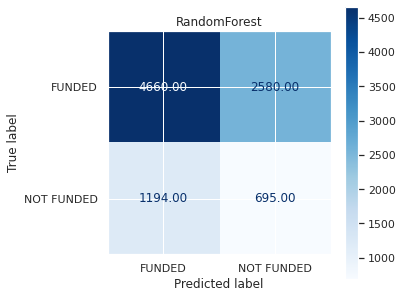

<Figure size 360x360 with 0 Axes>

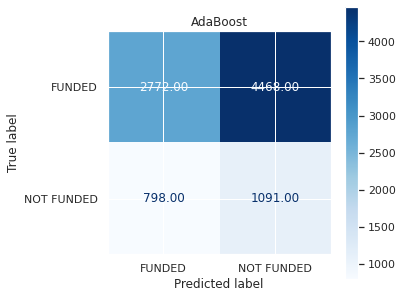

<Figure size 360x360 with 0 Axes>

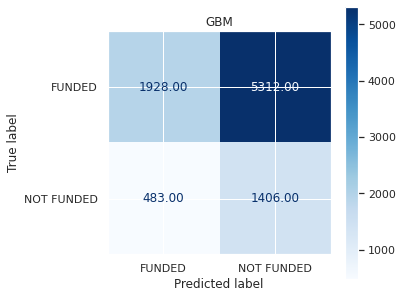

<Figure size 360x360 with 0 Axes>

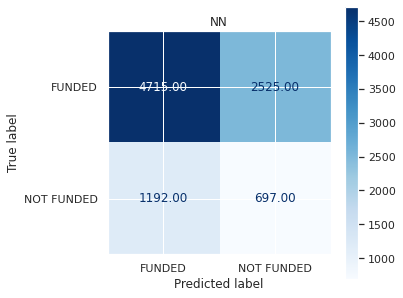

In [46]:
# Spot Check Algorithms
models = []
models.append(('LogisticRegression', LogisticRegression(random_state=0)))
models.append(('Bagging', BaggingClassifier(random_state=0)))
models.append(('RandomForest', RandomForestClassifier(random_state=0)))
models.append(('AdaBoost', AdaBoostClassifier(random_state=0)))
models.append(('GBM', GradientBoostingClassifier(random_state=0)))
models.append(('NN', MLPClassifier(random_state=0)))
results_tr = []
results_v = []
results_t = []
names = []
score = []
skf = StratifiedKFold(n_splits=5)
for (name, model) in models:
    param_grid = {}
    my_model = GridSearchCV(model,param_grid,cv=skf)
    my_model.fit(X_train_sc, y_train)
    predictions_tr = my_model.predict(X_train_sc) 
    predictions_v = my_model.predict(X_valid_sc)
    predictions_t = my_model.predict(X_test_sc)
    f1_train = f1_score(y_train, predictions_tr, average='macro') 
    f1_valid = f1_score(y_valid, predictions_v,average='macro') 
    f1_test = f1_score(y_test, predictions_t,average='macro') 
    results_tr.append(f1_train)
    results_v.append(f1_valid)
    results_t.append(f1_test)
    
    names.append(name)
    f_dict = {
        'model': name,
        'f1_train': f1_train,
        'f1_valid': f1_valid,
        'f1_test': f1_test
    }
    score.append(f_dict)
    # Computing Confusion matrix for the above algorithms
    sns.set( rc = {'figure.figsize': (5, 5)})
    plt.figure()
    plot_confusion_matrix(my_model,X_test_sc, y_test,values_format= '.2f', cmap='Blues')
    plt.title(name)
    plt.show()   
score = pd.DataFrame(score, columns = ['model','f1_train', 'f1_valid', 'f1_test'])

In [47]:
# Look at the F1 score for each model and for each data set
print(score)

                model  f1_train  f1_valid   f1_test
0  LogisticRegression  0.449283  0.446779  0.449131
1             Bagging  0.962349  0.450683  0.455136
2        RandomForest  0.999897  0.495027  0.490474
3            AdaBoost  0.466840  0.416680  0.402912
4                 GBM  0.473167  0.367773  0.363127
5                  NN  0.605604  0.504753  0.495009


Spot Check Algorithms


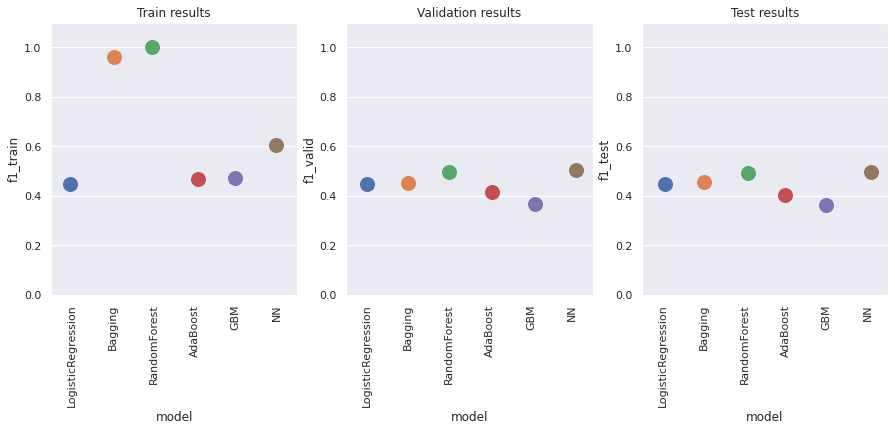

In [48]:
# Plot results for a graphical comparison
print("Spot Check Algorithms")
sns.set( rc = {'figure.figsize': (15, 5)})
plt.figure()
plt.subplot(1,3,1)  
sns.stripplot(x="model", y="f1_train",data=score,size=15)
plt.xticks(rotation=90)
plt.title('Train results')
axes = plt.gca()
axes.set_ylim([0,1.1])
plt.subplot(1,3,2)
sns.stripplot(x="model", y="f1_valid",data=score,size=15)
plt.xticks(rotation=90)
plt.title('Validation results')
axes = plt.gca()
axes.set_ylim([0,1.1])
plt.subplot(1,3,3)
sns.stripplot(x="model", y="f1_test",data=score,size=15)
plt.xticks(rotation=90)
plt.title('Test results')
axes = plt.gca()
axes.set_ylim([0,1.1])
plt.show()